# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("../data/COMP1801_Coursework_Dataset_Corrected.csv")
print(f"Number of rows = {df.shape[0]} & Columns = {df.shape[1]}:")
print(df.head()) 
print(df.info())  
print(df.describe())

Number of rows = 1000 & Columns = 16:
   Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0   1107.81    Valve    singleGrain           27        2.64       8.08   
1   1226.13    Valve       colGrain           24        4.06       1.11   
2   1914.12    Blade    singleGrain           20        4.36       8.54   
3   1240.83    Valve    singleGrain           14        3.59       8.83   
4   1599.40   Nozzle    singleGrain           22        3.06       3.04   

   HeatTreatTime  Nickel%  Iron%  Cobalt%  Chromium%  smallDefects  \
0          23.35    60.65  19.76    15.18       4.41             7   
1          24.98    52.47  31.63    12.32       3.58            30   
2          34.71    60.98  26.56    11.60       0.86            22   
3          21.61    54.13  26.71    17.81       1.35            10   
4          29.65    62.88  24.06    12.08       0.98            21   

   largeDefects  sliverDefects seedLocation    castType  
0             0              0  

In [3]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Lifespan,0,0.0
partType,0,0.0
microstructure,0,0.0
coolingRate,0,0.0
quenchTime,0,0.0
forgeTime,0,0.0
HeatTreatTime,0,0.0
Nickel%,0,0.0
Iron%,0,0.0
Cobalt%,0,0.0


#### **There are no missing values so no need for data imputation**

In [4]:
desc = df.describe().T
desc['Data Type'] = df.dtypes
desc = desc[['Data Type', 'mean', 'std','min','max']]
desc = desc.rename(columns={
    'mean':'Mean',
    'std' : 'Std Dev',
    'min' : 'Min' ,
    'max' : 'Max'
})


In [5]:
# Create a separate DataFrame for categorical features
cat_features = pd.DataFrame({
    'Attribute': ['partType', 'microstructure', 'seedLocation', 'castType'],
    'Data Type': ['Categorical'] * 4,
    'Description': [
        'Type of metal part (Blade, Nozzle, Valve, Block)',
        "Observed microstructure ('equiGrain', 'singleGrain', 'colGrain')",
        'Growth start location in mould (Top, Bottom)',
        'Type of casting method used (Die, Investment, Continuous)'
    ],
    'Mean': ['-'] * 4,
    'Std Dev': ['-'] * 4,
    'Min': ['-'] * 4,
    'Max': ['-'] * 4
})


In [6]:
numeric_table = desc.reset_index().rename(columns={'index': 'Attribute'})
numeric_table.insert(2, 'Description', ['Measured lifespan of a metal part (hours)',
                                        'Speed of liquid metal cooling (K/s)',
                                        'Time immersed in water (s)',
                                        'Time worked with hammer (s)',
                                        'Heat treatment duration (min)',
                                        'Nickel composition (%)',
                                        'Iron composition (%)',
                                        'Cobalt composition (%)',
                                        'Chromium composition (%)',
                                        'Number of small defects',
                                        'Number of large defects',
                                        'Number of sliver defects'])


eda_table = pd.concat([numeric_table, cat_features], ignore_index=True)


In [7]:
from IPython.display import display, HTML

display(HTML(eda_table.to_html(index=False, justify='center')))


Attribute,Data Type,Description,Mean,Std Dev,Min,Max
Lifespan,float64,Measured lifespan of a metal part (hours),1281.80612,341.136845,359.71,2046.41
coolingRate,int64,Speed of liquid metal cooling (K/s),17.615,7.480156,5.0,30.0
quenchTime,float64,Time immersed in water (s),2.69331,1.303057,0.51,5.0
forgeTime,float64,Time worked with hammer (s),5.48704,2.604827,1.01,9.97
HeatTreatTime,float64,Heat treatment duration (min),30.75928,17.054664,1.05,59.99
Nickel%,float64,Nickel composition (%),59.64644,5.745955,50.01,69.98
Iron%,float64,Iron composition (%),25.17329,7.312363,7.95,42.79
Cobalt%,float64,Cobalt composition (%),12.41628,4.222616,5.04,20.0
Chromium%,float64,Chromium composition (%),2.76399,1.307658,0.5,4.99
smallDefects,int64,Number of small defects,16.659,11.885874,0.0,59.0


### Dataset obersvations:

1. We have **12 numerical and 4 categorical** features
2. We can see that there are some features like 'Lifespan', 'HeatTreatTime' and 'Nickel%' that have quite a variation in their scales and this suggests we must **scale the dataset** using some sort of either standard scaler or something

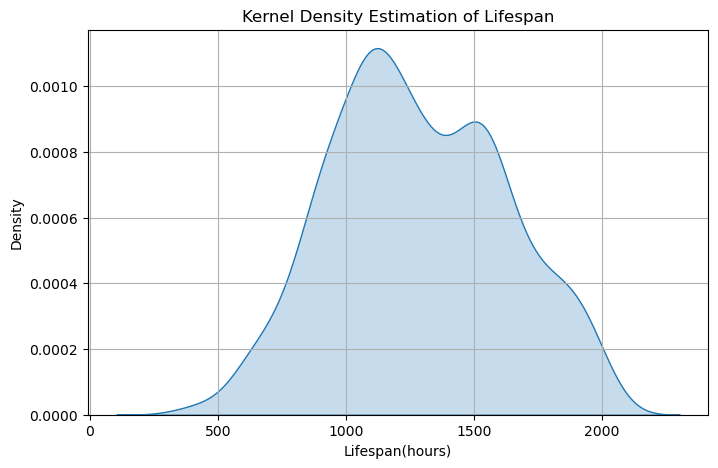

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

df1 = df.copy()
plt.figure(figsize=(8, 5))
sns.kdeplot(df1['Lifespan'], fill=True)
plt.title('Kernel Density Estimation of Lifespan')
plt.xlabel("Lifespan(hours)")
plt.ylabel("Density")
plt.grid(True)
plt.savefig("../report/figures/fig-1.1-Lifespan_Kde.png", dpi=500, bbox_inches='tight')
plt.show()

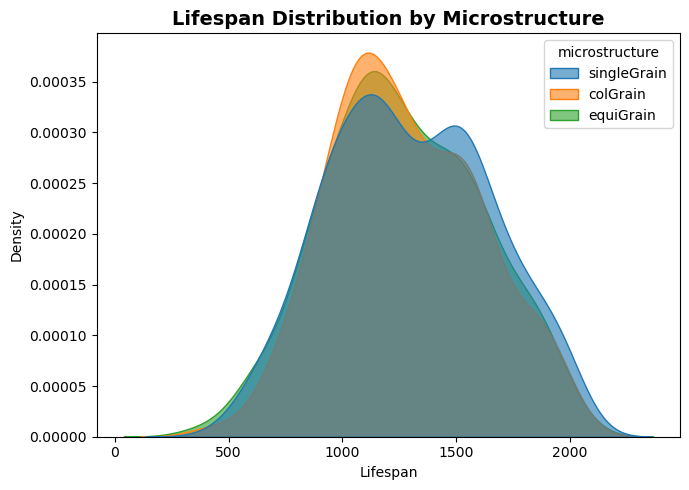

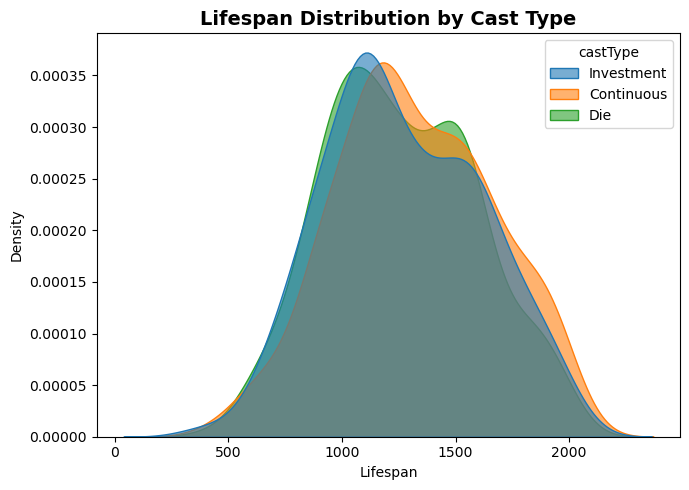

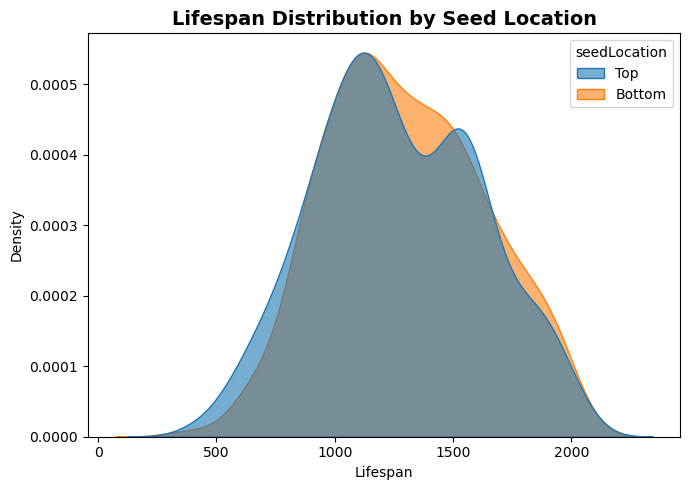

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if microstructure also creates distinct distributions
fig, ax = plt.subplots(figsize=(7, 5))
sns.kdeplot(data=df, x='Lifespan', hue='microstructure', fill=True, alpha=0.6, ax=ax)
plt.title('Lifespan Distribution by Microstructure', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Check castType
fig, ax = plt.subplots(figsize=(7, 5))
sns.kdeplot(data=df, x='Lifespan', hue='castType', fill=True, alpha=0.6, ax=ax)
plt.title('Lifespan Distribution by Cast Type', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Check seedLocation
fig, ax = plt.subplots(figsize=(7, 5))
sns.kdeplot(data=df, x='Lifespan', hue='seedLocation', fill=True, alpha=0.6, ax=ax)
plt.title('Lifespan Distribution by Seed Location', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


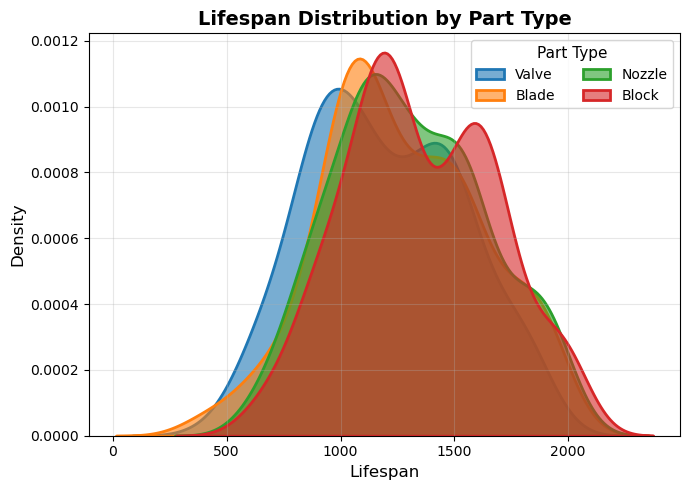

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(7, 5))

# Using seaborn's kdeplot for a cleaner look with filled areas
for category in df['partType'].unique():
    subset = df[df['partType'] == category]['Lifespan']
    sns.kdeplot(data=df[df['partType'] == category], x='Lifespan', 
                label=category, fill=True, alpha=0.6, ax=ax, linewidth=2)

ax.set_xlabel('Lifespan', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Lifespan Distribution by Part Type', fontsize=14, fontweight='bold')
ax.legend(title='Part Type', fontsize=10, title_fontsize=11, ncol=2)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("../report/figures/fig-1.11-Lifespan_Kde.png", dpi=500, bbox_inches='tight')
plt.show()


### Kernel Density Estimation(Kde) Observations
1. This plot performs univariate analysis for 'Lifespan' feature
2. We can clearly see that the distribution of this plot is not perfectly normal
3. This distribution contains two peaks at values around '1100' hours and another one at '1500' hours
4. We can also see that there is no skewness in the data as the data is heavily centered around 2 peaks in the middle
5. **Multi-modal** nature of this graph comples us to use **GMM clustering** to found natural groupings as suggested by Jain's work(Jain, 2010).

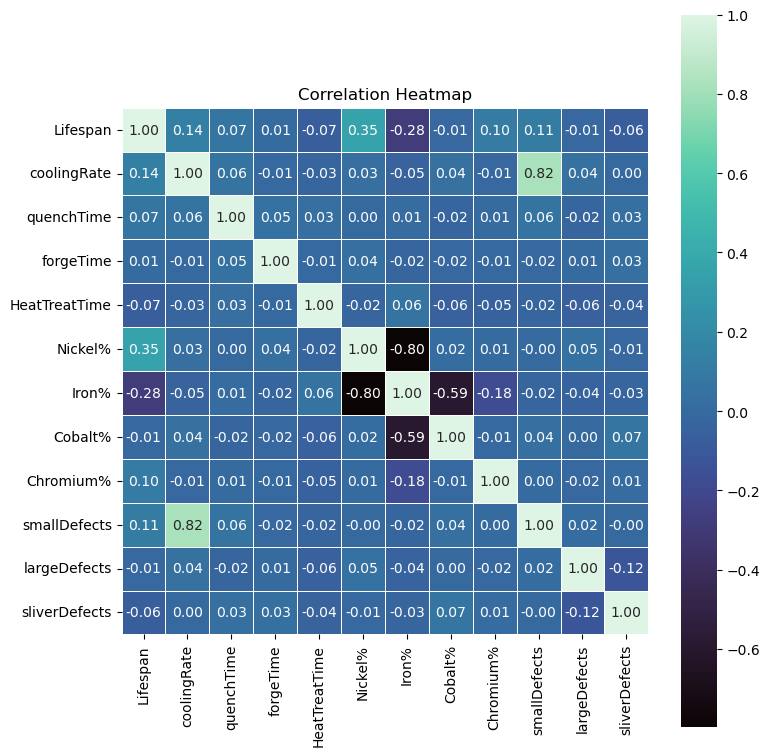

In [11]:
# plotting Person's correlation of 'Lifespan'

num_col = df1.select_dtypes(include=['float64','int64']).columns
corr_matrix = df1[num_col].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='mako', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('../report/figures/fig-1.2-correlation_heatmap.png', dpi=500, bbox_inches='tight')
plt.show()

### Correlation Heatmap observations

1. We can clearly see there is a strong positive and negative correlation between **'Lifespan'** and **'Nickel%'** and **'Lifespan'** and **'Iron%'** respectively. So these two explain a lot about our target Lifespan
2. There seems be strong negative correlation among the following feature variables suggesting some form of multi-collinearity:
    a. 'Iron%' and'Nickel%' 
    b. 'Iron%' and 'Cobalt%'
3. Tree-based ensemble models are well adept at handling collinearity (Civantos-Gómez et al., 2021).
4. coolingRate, forgeTime and Iron% have very weak correlations. They are unlikely to be useful for modelling

### Categorical Feature distribution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6808\855664505.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, ax=axes[i],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6808\855664505.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, ax=axes[i],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6808\855664505.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, ax=axes[i],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6808\855664505.py:20: FutureWarning: 

Passing `palette` without assig

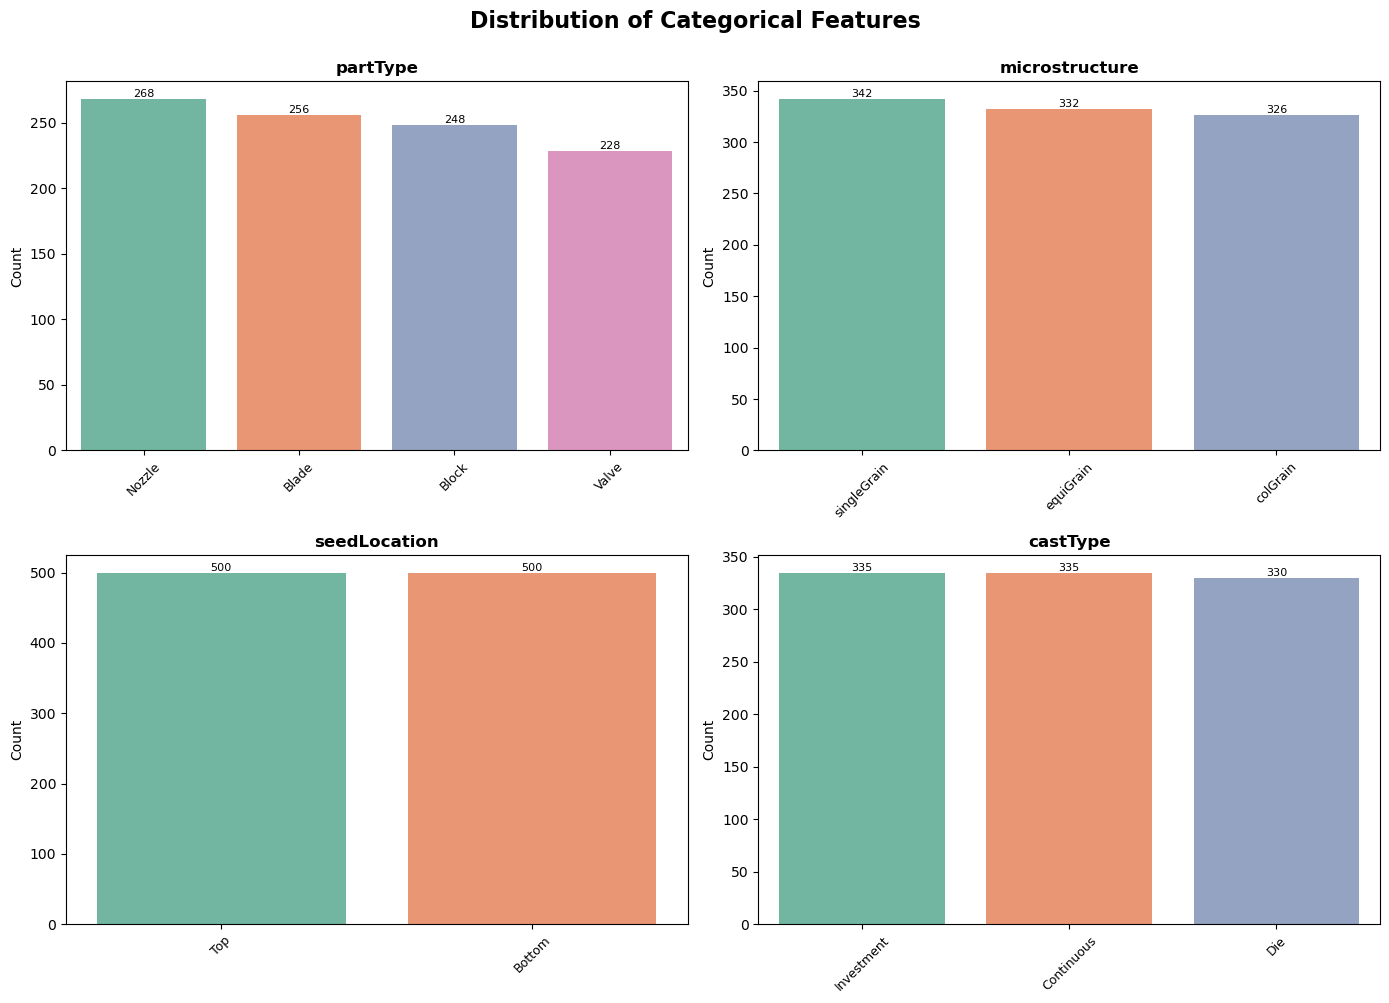

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get categorical columns
cat_col = df1.select_dtypes(include=['object', 'category']).columns
n_cols = len(cat_col)

# Calculate grid dimensions
n_rows = int(np.ceil(n_cols / 2))  # 2 plots per row
n_subplot_cols = min(n_cols, 2)

# Create figure
fig, axes = plt.subplots(n_rows, n_subplot_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

# Plot each categorical feature
for i, col in enumerate(cat_col):
    # Count plot
    sns.countplot(data=df1, x=col, ax=axes[i], 
                  palette='Set2', 
                  order=df1[col].value_counts().index)
    
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45, labelsize=9)
    
    # Add count labels on top of bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fontsize=8)

# Hide extra subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Overall title
plt.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold', y=0.998)
plt.tight_layout()

# Save as one combined image
plt.savefig('../report/figures/fig-1.33-categorical-distributions.png', dpi=300, bbox_inches='tight')
plt.show()


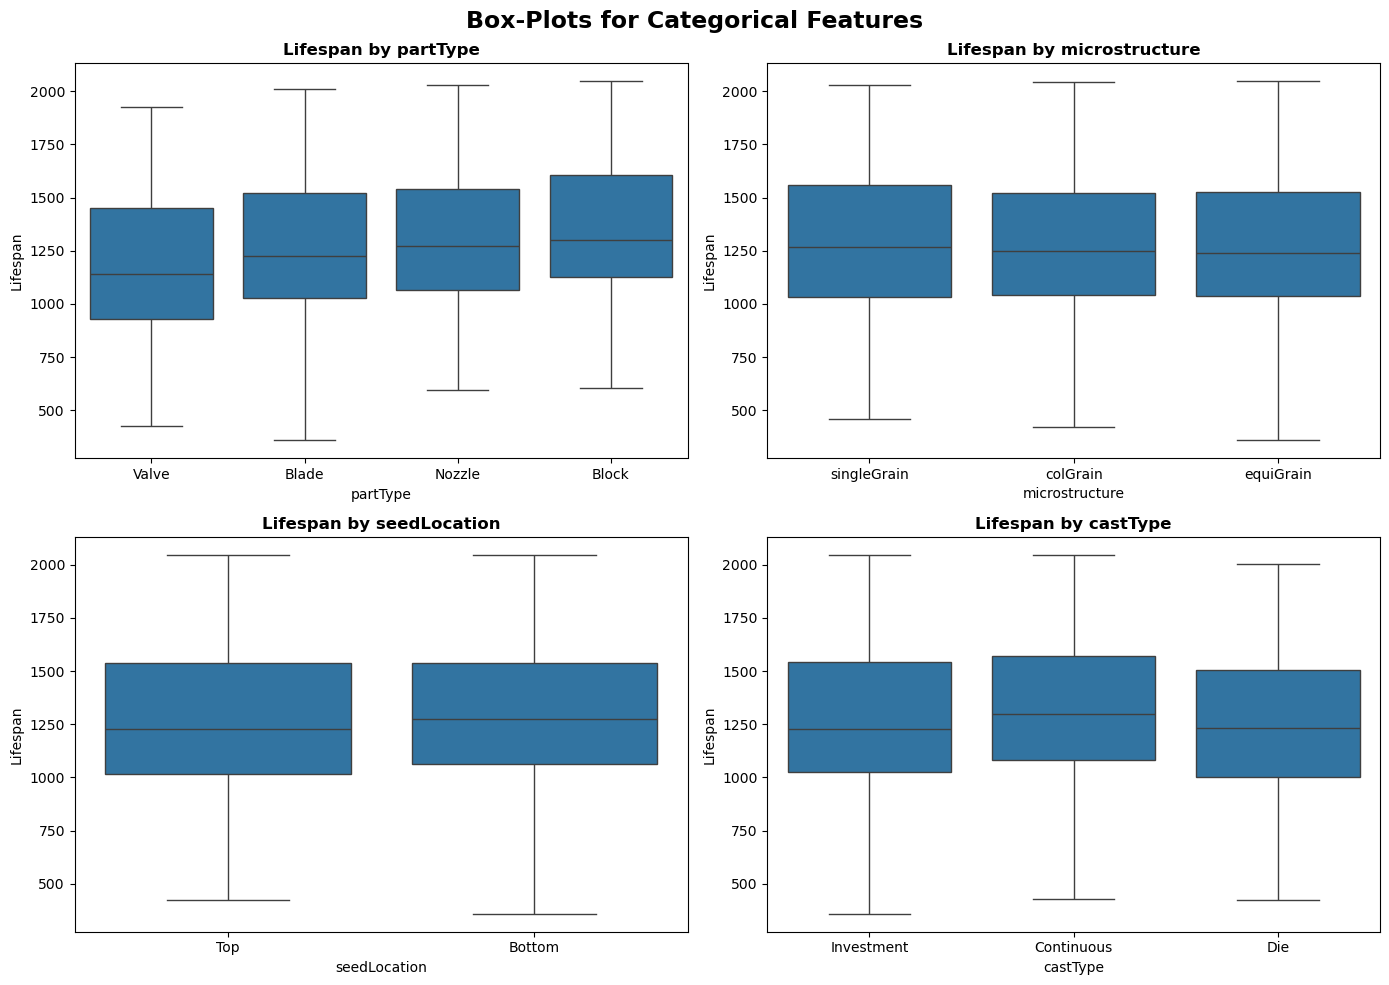

In [13]:
# Box-plots for categorical variables

cat_col = df.select_dtypes(include=['object','category']).columns
n_cols = len(cat_col)

n_rows = int(np.ceil(n_cols/2))
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_col):
    sns.boxplot(x=df[col], y=df['Lifespan'], ax=axes[i])
    axes[i].set_title(f"Lifespan by {col}", fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Lifespan', fontsize=10)
    axes[i].set_xlabel(col, fontsize=10)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Box-Plots for Categorical Features', fontsize=17, fontweight='bold')
plt.tight_layout()

plt.savefig('../report/figures/fig-1.3-boxplot-categorical-features.png', dpi=500, bbox_inches='tight')
plt.show()

### Boxplot Observations:

1. Boxplot shows of Lifespan with each categorical variable appears to be reasonaby symmetric with no extreme outliers
2. This suggests there is no need of aggressive data preprocessing like outlier removal and that standard modelling techniques could be used confidently
3. The relatively consistent spread of medians also tells that categorical variables are not dominated by isolated outliers

### Numerical feature distributions

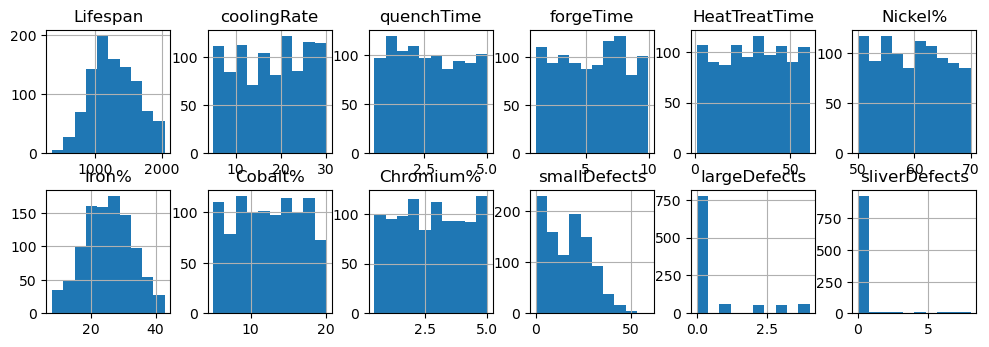

In [14]:
df1.hist(figsize=(12,12), layout=(6,6))
plt.savefig("../report/figures/fig-1.7-histplot.png",dpi=500)
plt.show()

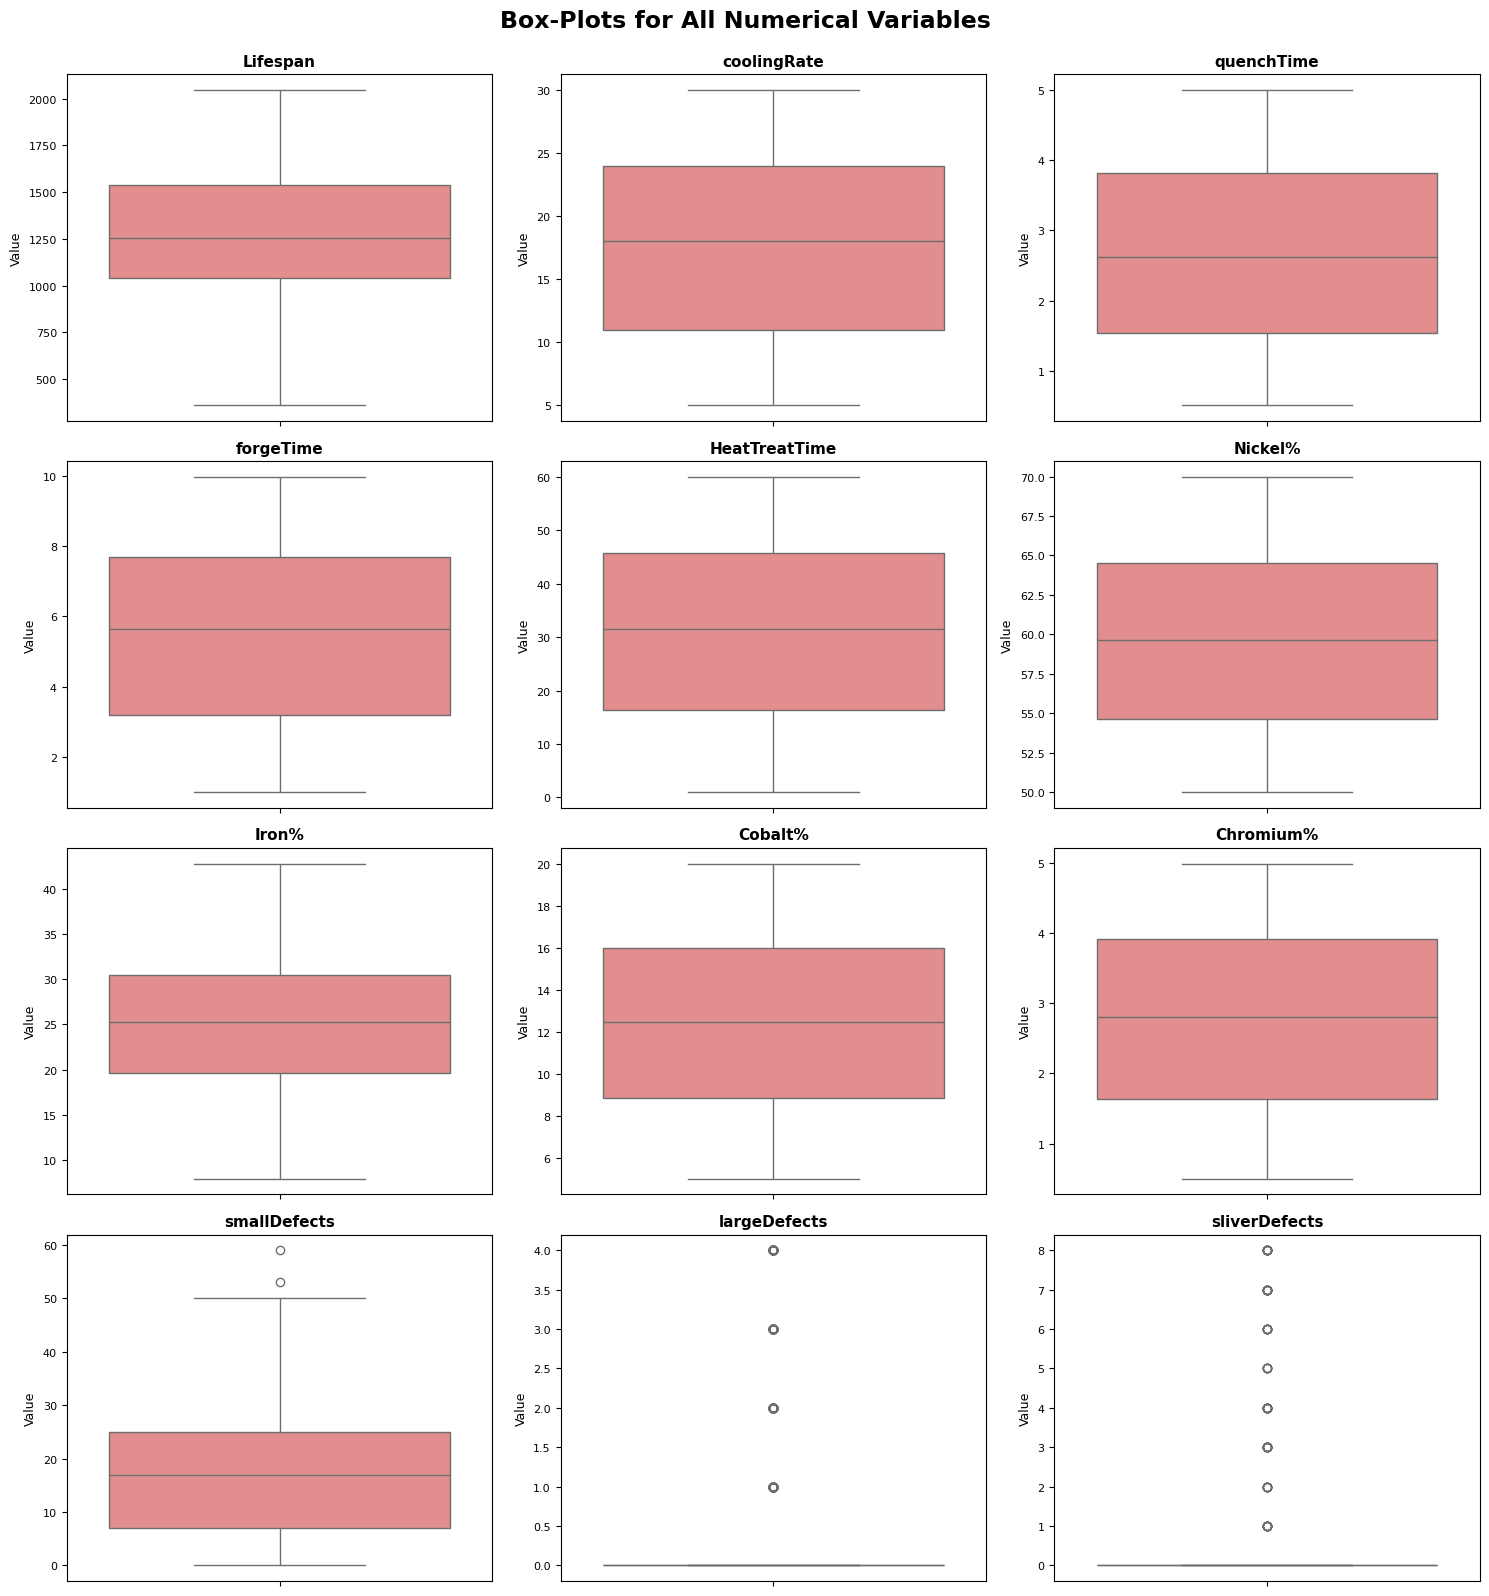

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_col = df.select_dtypes(include=['int64','float64']).columns
n_cols = len(num_col)

n_rows = int(np.ceil(n_cols/3))
n_subplot_cols = min(n_cols, 3)

fig, axes = plt.subplots(n_rows, n_subplot_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(y = df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f"{col}", fontsize=11, fontweight='bold')
    axes[i].set_ylabel('Value', fontsize=9)
    axes[i].tick_params(axis='both', labelsize=8)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Box-Plots for All Numerical Variables', fontsize=17, fontweight='bold', y=0.995)

plt.tight_layout()

plt.savefig('../report/figures/fig-1.33-boxplot-numerical.png', dpi=500, bbox_inches='tight')

plt.show()

### Boxplot numerical features observations:

1. Lifespan, coolingRate, forgeTime, etc., seem to be roughly **normally distributed**
2. smallDefects, largeDefects and sliverDefects show a outliers. The distributions for these seem to be right-skewed
3. Outliers like these warrant a **tree-based models**  

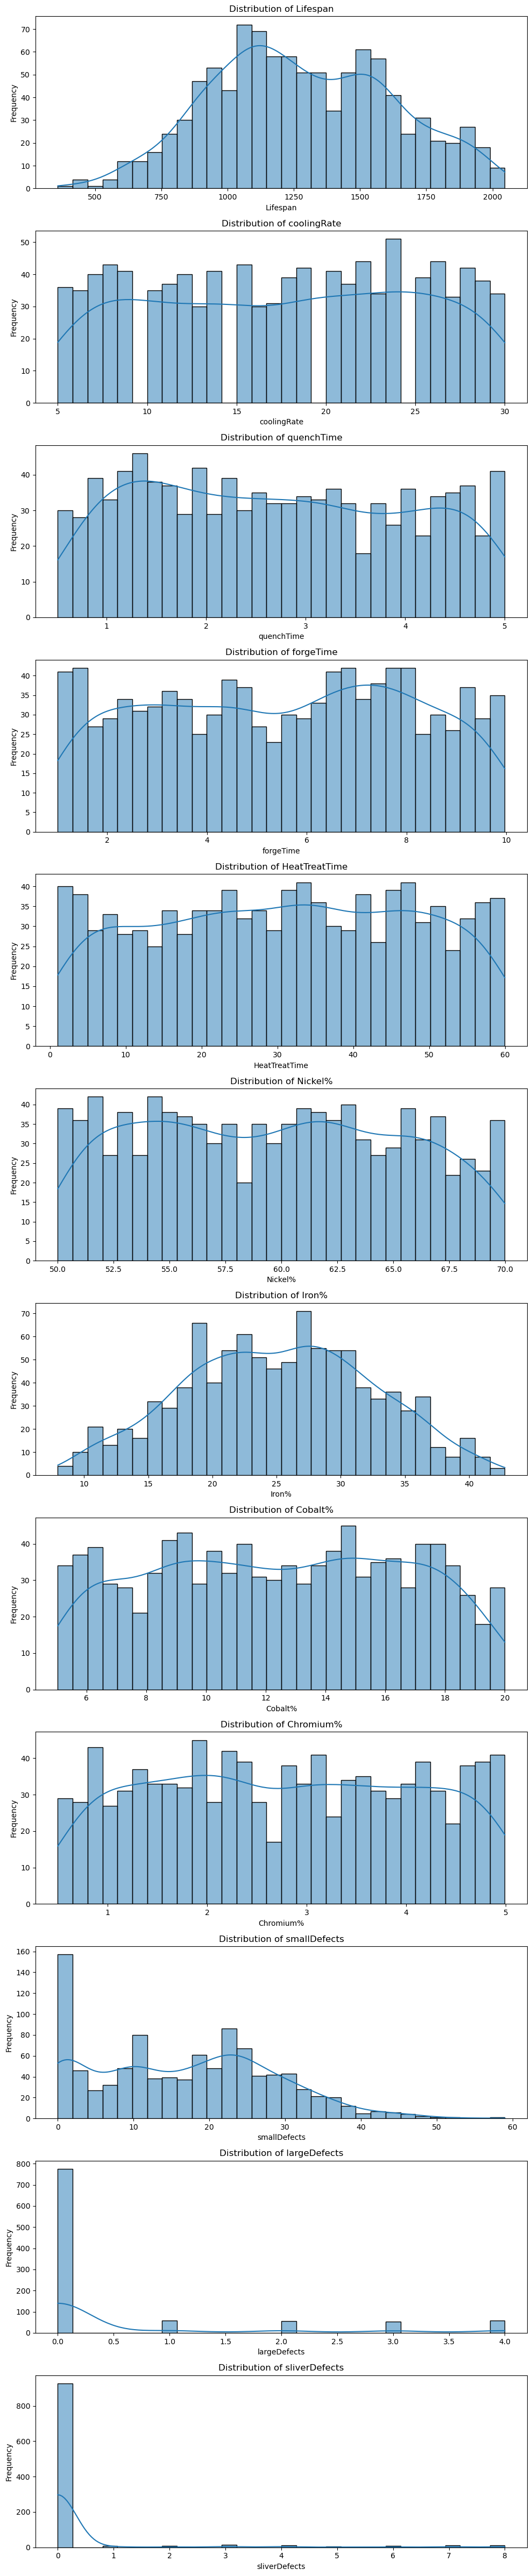

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_predictors = ['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime', 
                        'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%', 
                        'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects']
num_cols = len(numerical_predictors)
fig, axes = plt.subplots(nrows=num_cols, figsize=(10, 4*num_cols))
axes = axes.ravel()

for idx, col in enumerate(numerical_predictors):
    sns.histplot(data=df1, x=col, kde=True, ax=axes[idx], bins=30)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig("../report/figures/fig-1.5-num-dist.png", dpi=500)
plt.show()


### Numerical distribution observations:

1. **multi-modal** nature of Lifespan is observed
2. Features like coolingRate, quenchTime, forgeTime, HeatTreatTime and the composition percentages show varying shapes. Some are uniform and others are slightly skewed but are **not significantly problematic**
3. The defect counts are clearly **right-skewed**

---

### Scatter Plots (Lifespan Vs Features)

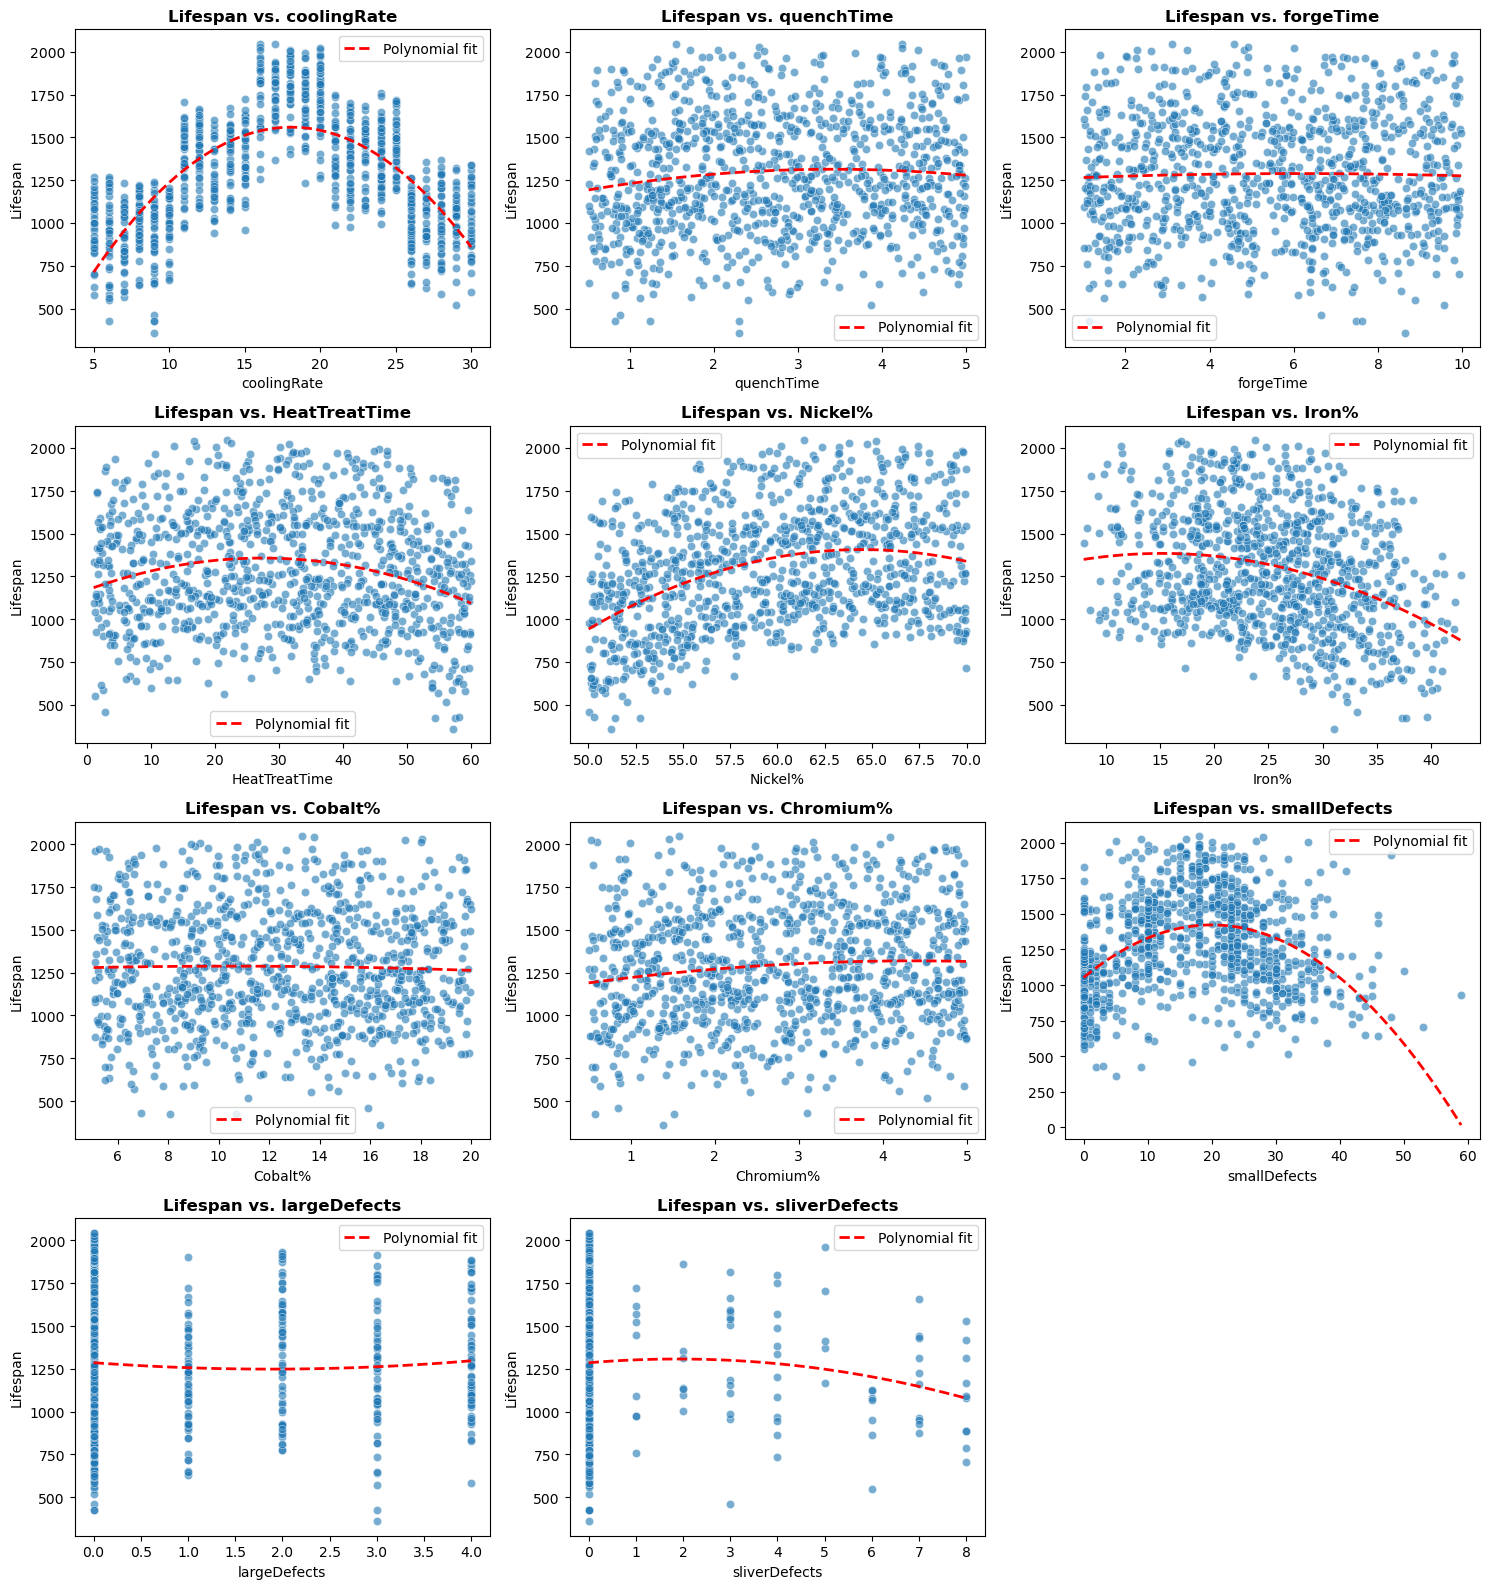

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numerical_predictors = ['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime', 
                        'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%', 
                        'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects']

features = [col for col in numerical_predictors if col != 'Lifespan']

ncols = 3
nrows = (len(features) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
axes = axes.ravel()

for idx, x_col in enumerate(features):
    sns.scatterplot(data=df1, x=x_col, y='Lifespan', ax=axes[idx], alpha=0.6)
    axes[idx].set_title(f'Lifespan vs. {x_col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(x_col)
    axes[idx].set_ylabel('Lifespan')
    
   
    z = np.polyfit(df1[x_col], df1['Lifespan'], 2)
    p = np.poly1d(z)
    x_line = np.linspace(df1[x_col].min(), df1[x_col].max(), 100)
    axes[idx].plot(x_line, p(x_line), "r--", linewidth=2, label='Polynomial fit')
    axes[idx].legend()

for idx in range(len(features), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('../report/figures/fig-1.6-scatter-relationships.png', dpi=500, bbox_inches='tight')
plt.show()


### Scatter plot observations:

1. **Strong non-linear** relationship observed for the following:
    a. Lifespan vs. coolingRate
    b. Lifespan vs. smallDefects
2. Relationship among Lifespan vs. Nickel% & Lifespan vs. Iron% also are slightly curved 
3. **Linear** trend observed for the following:
    a. Lifespan vs. quenchTime
    b. Lifespan vs forgeTime
4. **Skewed** trend observed for the largeDefects and sliverDefects

---

## Action Plan:


**1.Regression Plan**: The correlation heatmap indicated strong negative correlations between predictors variables like Iron% and Nickel%, suggesting potential multi-collinearity. 
Given these findings it is hypothesised that standard linear models will not be sufficient. We must look for models that are **robust to multi-collinearity** (like tree-based ensemble methods) or capable of caputring non-linear patterns (like SVR with RBF kernel). 
The observed variation in scales also necessitates feature scaling.
The observation also shows data is not perfectly linear for most of the features indicating using a **non-linear model**

**2. Classification Plan**: The Kernel density estimation plot clearly showed that the target variable. Lifespan, shows multi-model distribution around 1100 hours and 1500 hours. This shows there maybe several distinct sub-groups rather than just two threshold. Therefore it is hypothesised that applying **upsupervised clustering algorithms** (like GMM) to the data will identify more meaningful and data-driven class labels for classification

## Action Plan:

### Pre-processing:
1. **Transformation**: the right-skewed defect-related features (smallDefects, largeDefects, sliverDefects) will be log-transformed to help normalize their distributions
2. **Scaling**: All numerical features will be scaled to ensure there are no outliers remaining
3. **Encoding**: The categorical features (partType, microstructure, seedLocation, castType) will be converted to numerical formats using **One-Hot encoding** as they have no inherent order


### Regression:
1. **Tree-Based Ensembles**: RandomForestRegressor and GradientBoostingRegressor will be primary candidates as they are non-linear, robust to outliers and less affected by multi-collinearity
2. **Non-Linear Kernel Methods**: Support Vector Regression (SVR) with a non-linear kernel (eg. 'rbf') will also be considered to capture complex patterns


### Classification:
An importarnt insight form EDA was the **multi-modal** distribution of the target variable. This indicates a more sophisticated data-driven approach is needed.
1. **A GaussianMixtureModel(GMM)**: will be considered to be applied on Lifespan directly
2. **Data-Driven Labels**: The clusters ultimately generated by GMM will be used as the ground-truth target for classification. This seems to be more robust form of classification